<a href="https://colab.research.google.com/github/ArunK-ML/Learn---XG-Boost-KNN-SVM/blob/main/model%20analysis_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# Count Duplicate entry

df.duplicated().sum()

np.int64(3854)

In [5]:
# dropping duplicates

df.drop_duplicates(keep = "last",inplace = True)

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [7]:
df["smoking_history"].unique()

array(['never', 'current', 'No Info', 'former', 'ever', 'not current'],
      dtype=object)

In [8]:
# Convert to binary classification: Class 2 = positive (0), others = negative (1)

# To change the object into numbers based on ASCII value

from sklearn.preprocessing import LabelEncoder

code = LabelEncoder()

for i in df.columns:
  if df[i].dtype=="object":
    df[i]= code.fit_transform(df[i]) # Encoding

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


**Encoding**

**Gender**

Female = 0,
Male = 1,
Other = 2

**smoking_history**

'never' = 4 , 'No Info' = 0 , 'current' = 1, 'former' = 3, 'ever' = 2, 'not current' = 5

In [9]:
# Where independent = x , dependent = y

x = df.iloc[:,:-1] # x = defining independent columns with all the row
y = df.iloc[:,-1]  # y = defining dependent columns with all the row

In [10]:
x.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [11]:
y.name

'diabetes'

In [12]:
# Check the shape of x and y

x.shape, y.shape

((96146, 8), (96146,))

In [13]:
# Count the diabetes

df["diabetes"].value_counts()

,count
diabetes,
0,87664
1,8482


In [14]:
df.shape

(96146, 9)

# **Machine Learning**

# **KNN - (K-Nearest Neighbors)**

It’s a supervised machine learning algorithm used for:

✅ Classification (e.g., "Is this a cat or dog?")

✅ Regression (e.g., "What is the price of a house?")

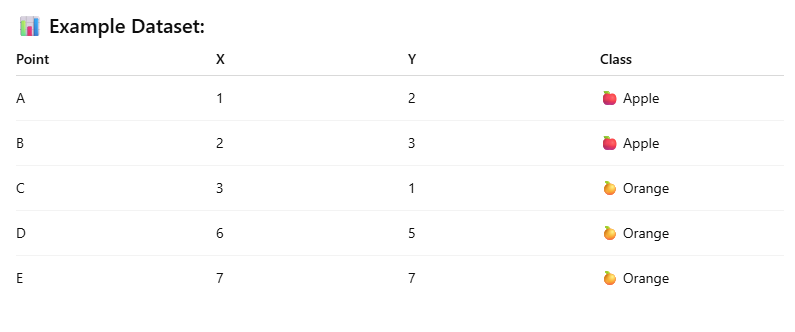

**❓ New Point to Predict:**

Test Point (T) = (4, 4)

**We want to know:** Is it an 🍎 Apple or 🍊 Orange?

**Let’s use:**

K = 3

Distance = Euclidean distance

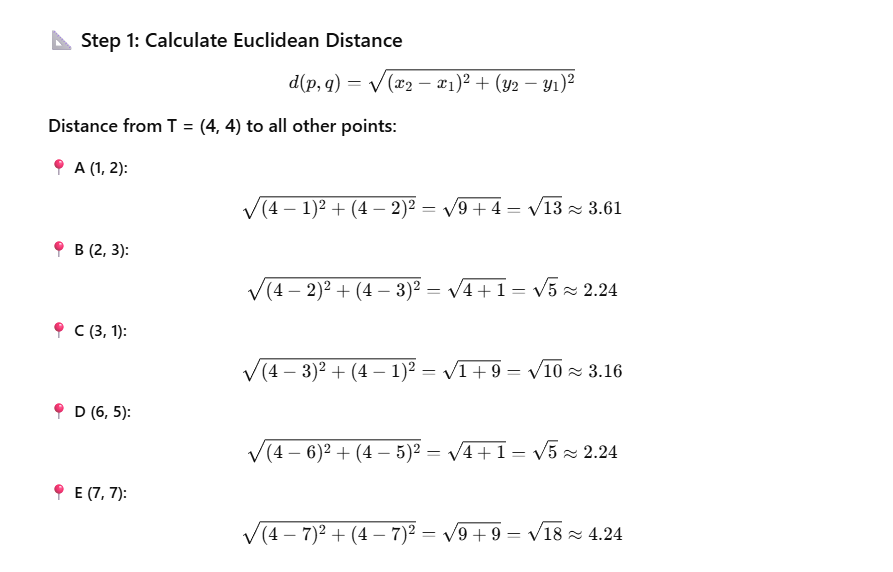

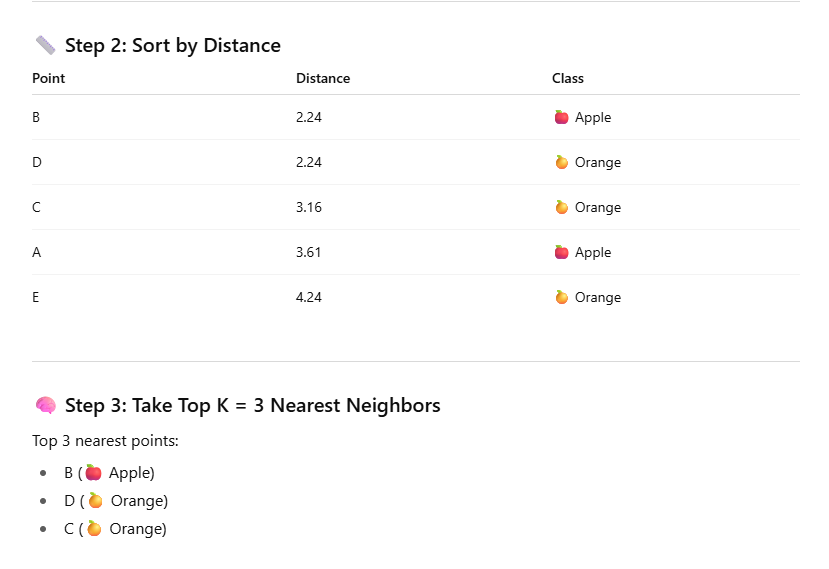

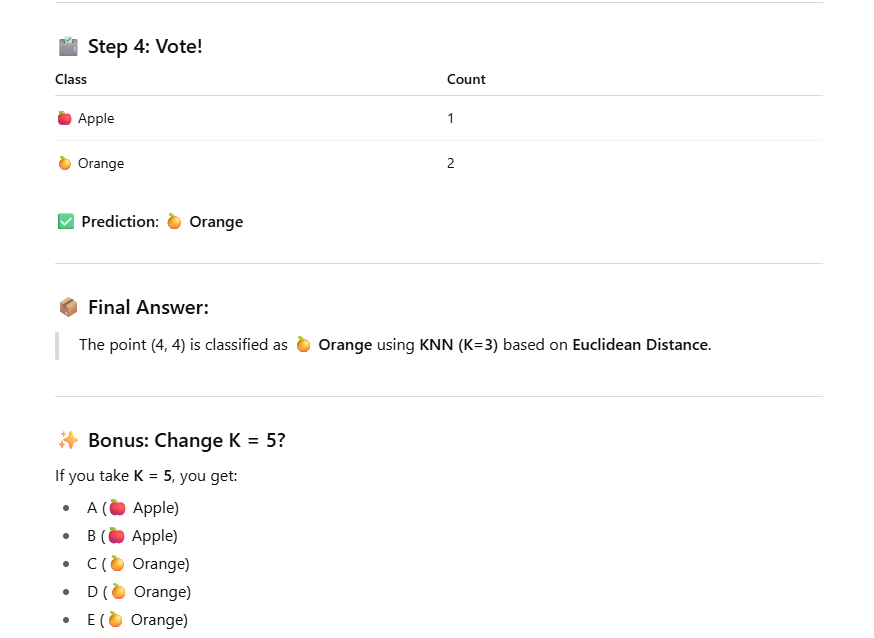

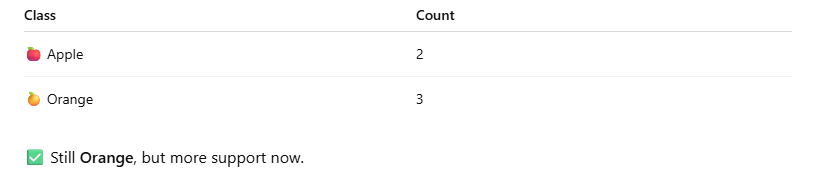

**Graphical Explaination**

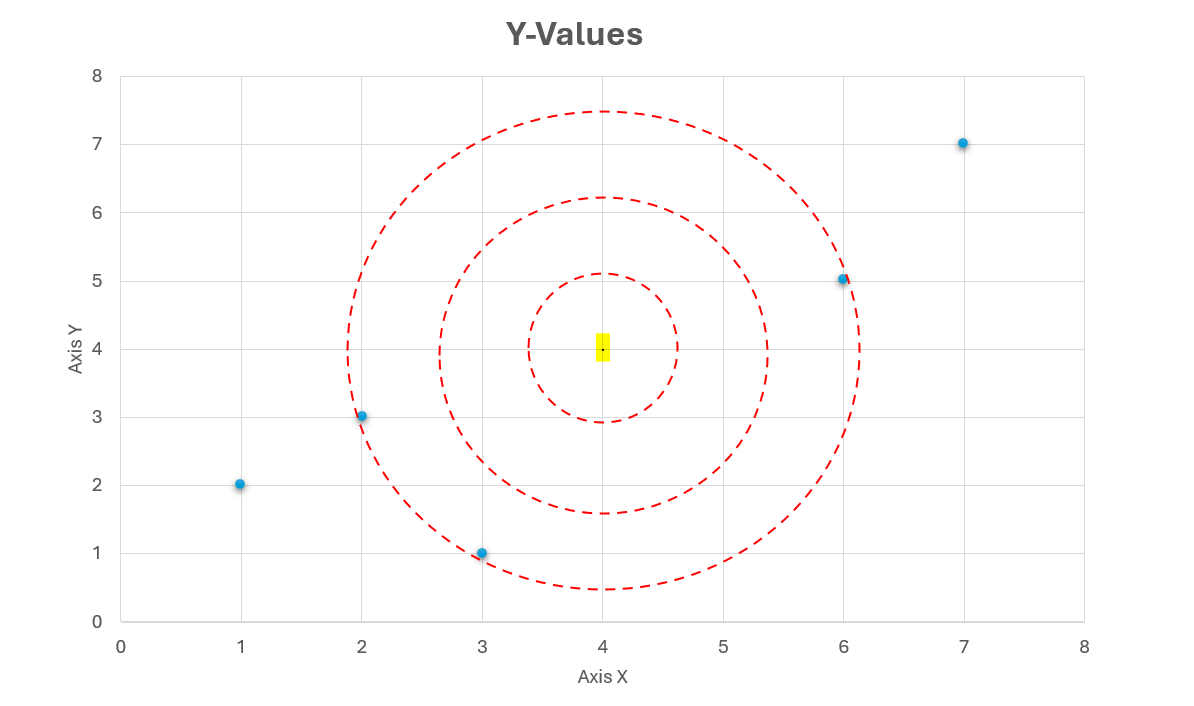

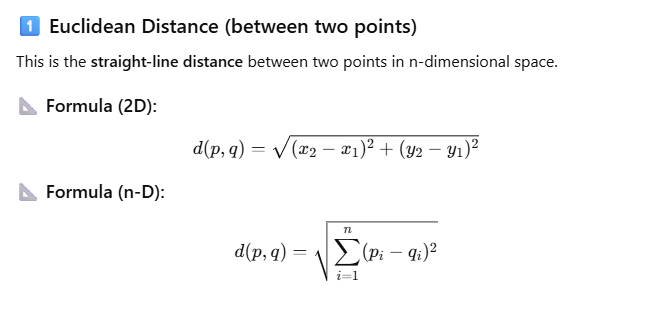

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Predict
predictions = knn.predict(x_test)

# classification
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17596
           1       0.80      0.55      0.65      1634

    accuracy                           0.95     19230
   macro avg       0.88      0.77      0.81     19230
weighted avg       0.95      0.95      0.95     19230



              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.94      0.88      0.91        17

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



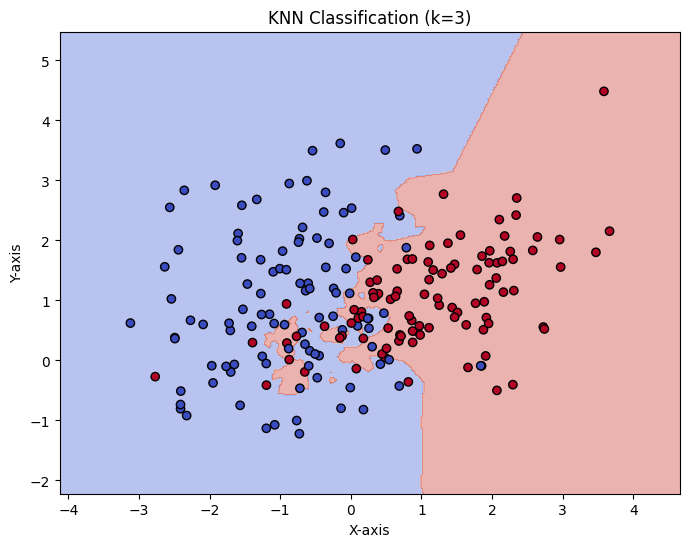

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Create synthetic 2D data
x, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Predict
predictions = knn.predict(x_test)
print(classification_report(y_test, predictions))

# Plotting the decision boundary
h = 0.02  # step size
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("KNN Classification (k=3)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.94      0.88      0.91        17

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



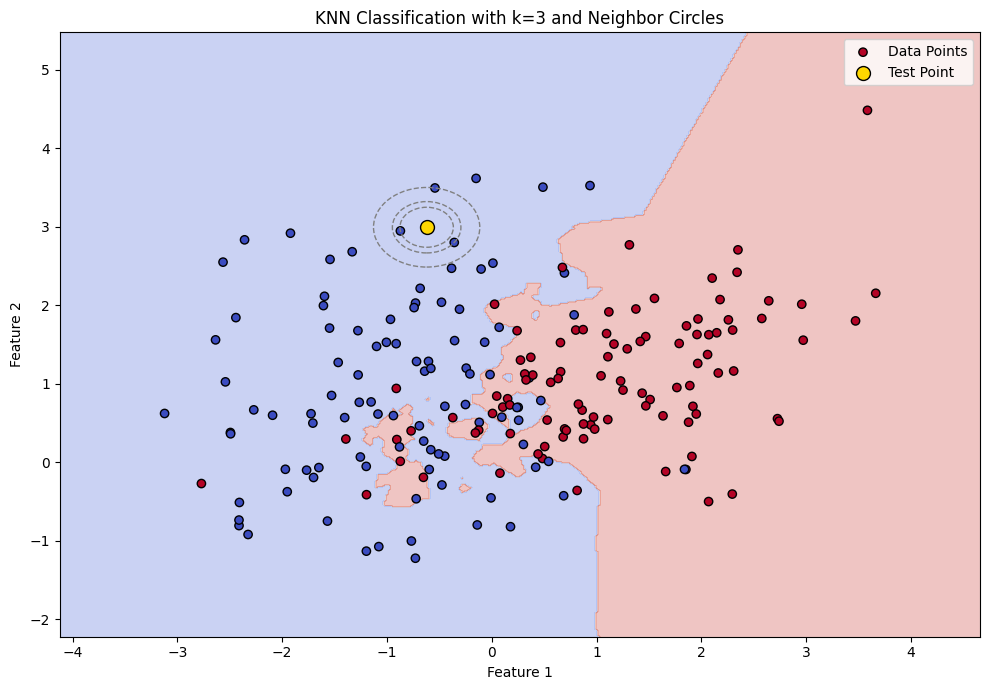

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# 1. Generate synthetic 2D classification data
x, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Train a KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

# 4. Predict and print classification report
predictions = knn.predict(x_test)
print(classification_report(y_test, predictions))

# 5. Create meshgrid for decision boundary
h = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Plot decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', edgecolor='k', label='Data Points')

# 7. Highlight a test point
test_point = x_test[0].reshape(1, -1)
neighbors = knn.kneighbors(test_point, return_distance=False)
neighbor_points = x_train[neighbors[0]]

# Draw test point in gold
plt.scatter(test_point[:, 0], test_point[:, 1], color='gold', edgecolor='black', s=100, label='Test Point')

# Draw dashed gray circles to nearest neighbors
for pt in neighbor_points:
    radius = np.linalg.norm(test_point[0] - pt)
    circle = plt.Circle(test_point[0], radius, color='gray', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

# 8. Add plot labels and show
plt.title(f"KNN Classification with k={k} and Neighbor Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()
